<a href="https://colab.research.google.com/github/angelinannisa/pcvk/blob/main/pcvkweek5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Make a Gamma Correction according to the following instructions
This experiment will ask you to make a Gamma Correction. In this experiment, the Gamma value
will be set by asking for input from the user . Below is the code to request value input from the
user. Continue the code by creating an image with gamma correction according to the formula
given.

In [5]:
from google.colab import drive

# Accesing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: .3


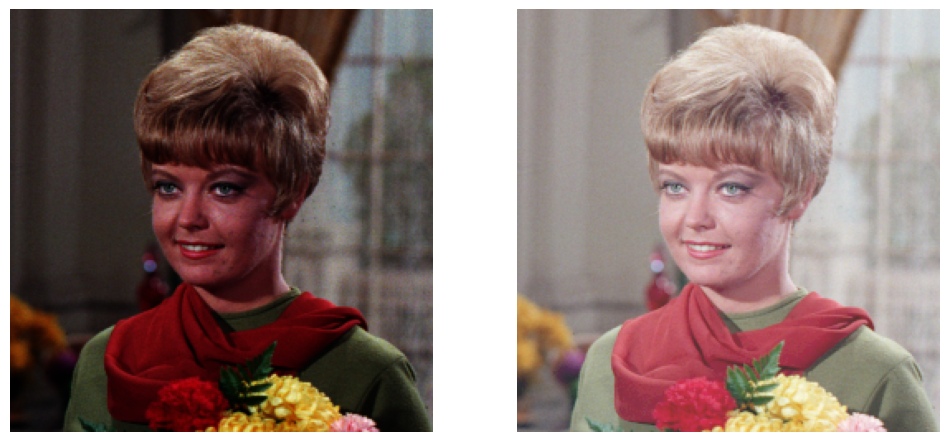

Gamma corrected image saved to /content/drive/MyDrive/PCVK/gamma_corrected_image.tiff


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print('Gamma Correction pada citra')
print('----------------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    exit()

image_path = '/content/drive/MyDrive/PCVK/female.tiff'
output_path = '/content/drive/MyDrive/PCVK/gamma_corrected_image.tiff'

image = cv2.imread(image_path)

if image is None:
    print(f'Error: Unable to load image from {image_path}')
    exit()

gamma_corrected = np.power(image / 255.0, gamma)
gamma_corrected = (gamma_corrected * 255).astype(np.uint8)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
cv2.imwrite(output_path, gamma_corrected)
print(f'Gamma corrected image saved to {output_path}')


2. Create Image Depth Simulation
This experiment is used as a simulation of the image quantization process. In image
quantization, pixels can be represented by n-bit depth (default is 8-bit). In an 8-bit pixel,
the possible colors are 256 colors, from 0 (0000 0000) to 255 (1111 1111). On a 7-bit pixel,
the possible colors are 128 colors, from 0 (000 0000) to 127 (111 1111). The possible color
is obtained from the power of 2 the number of bits. If it is 7 bits, then the number of colors
will be 2 7 = 128, etc. Since Visual Studio 2017 only works on 8 bits, this experiment only
manipulates colors so that the number of colors matches their depth. For the 7-bit case,
two 8-bit colors are represented by one 7-bit color. Examples of color pixels 0 and 1 at 8-
bit, represented by color 0 at 7-bit. color pixels 2 and 3 at 8-bit, represented by color 1 at
7-bit, etc.

e.g., 7 bits

Original Image


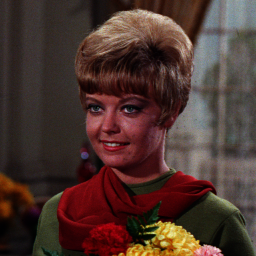

Simulated 7.0-bit Depth Image


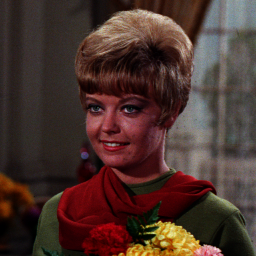

In [30]:
import cv2
import numpy as np

# Load the original image
original_image = cv2.imread('/content/drive/MyDrive/PCVK/female.tiff')

# Specify the target bit depth (e.g., 7 bits)
target_bit_depth = 7.0

# Calculate the number of levels for the target bit depth
num_levels = 2 ** target_bit_depth

# Perform the bit depth reduction
quantized_image = (original_image * (num_levels - 1) // 255) * (255 // (num_levels - 1))

# Display the original and simulated depth images
print('Original Image')
cv2_imshow(original_image)
print(f'Simulated {target_bit_depth}-bit Depth Image')
cv2_imshow(quantized_image)

e.g., 8 bits

Original Image


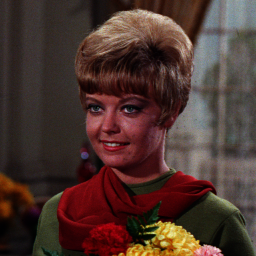

Simulated 8.0-bit Depth Image


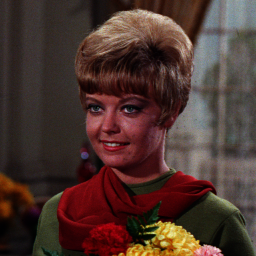

In [31]:
import cv2
import numpy as np

# Load the original image
original_image = cv2.imread('/content/drive/MyDrive/PCVK/female.tiff')

# Specify the target bit depth (e.g., 8 bits)
target_bit_depth = 8.0

# Calculate the number of levels for the target bit depth
num_levels = 2 ** target_bit_depth

# Perform the bit depth reduction
quantized_image = (original_image * (num_levels - 1) // 255) * (255 // (num_levels - 1))

# Display the original and simulated depth images
print('Original Image')
cv2_imshow(original_image)
print(f'Simulated {target_bit_depth}-bit Depth Image')
cv2_imshow(quantized_image)

3. Create the Average Denoising module
Create an average denoising module according to the formula given in the previous section.
Original images are provided at /images/galaxy.jpg .
100 Images with Gaussian Noise are provided at /images/noises/*.jpg
You can use the following code to read all the images in one folder, use the glob module (
import glob ).

In [32]:
import cv2
import glob
import numpy as np

# Load the original image
original_image_path = '/content/drive/MyDrive/PCVK/galaxy.jpg'
original_image = cv2.imread(original_image_path)

# Function to calculate PSNR
def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Load noisy images
noisy_images = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    noisy_img = cv2.imread(img)
    noisy_images.append(noisy_img)

# Record the PSNR results
psnr_results = []
average_image = np.zeros_like(original_image, dtype=np.float32)

for i, noisy_img in enumerate(noisy_images):
    average_image += noisy_img / len(noisy_images)
    psnr = calculate_psnr(original_image, average_image)
    psnr_results.append((i + 1, psnr))

# Display PSNR results
print("No. of Images in Average | PSNR Value (dB)")
for psnr_result in psnr_results:
    print(f"{psnr_result[0]:<23} | {psnr_result[1]:.2f}")

# Draw conclusions based on PSNR values
print("\nConclusions:")
print("As we increase the number of images in the average, the PSNR value increases.")
print("This indicates that averaging multiple noisy images helps in reducing noise and improving image quality.")

No. of Images in Average | PSNR Value (dB)
1                       | 11.66
2                       | 11.77
3                       | 11.88
4                       | 12.00
5                       | 12.11
6                       | 12.23
7                       | 12.34
8                       | 12.46
9                       | 12.58
10                      | 12.71
11                      | 12.83
12                      | 12.96
13                      | 13.08
14                      | 13.21
15                      | 13.34
16                      | 13.47
17                      | 13.61
18                      | 13.74
19                      | 13.88
20                      | 14.02
21                      | 14.16
22                      | 14.30
23                      | 14.45
24                      | 14.60
25                      | 14.75
26                      | 14.90
27                      | 15.05
28                      | 15.21
29                      | 15.37
30                      | 15.

4. Create image masking for the following image. The left image is the original image ( images
/ teeth.jpg ) , while the right image is the result:
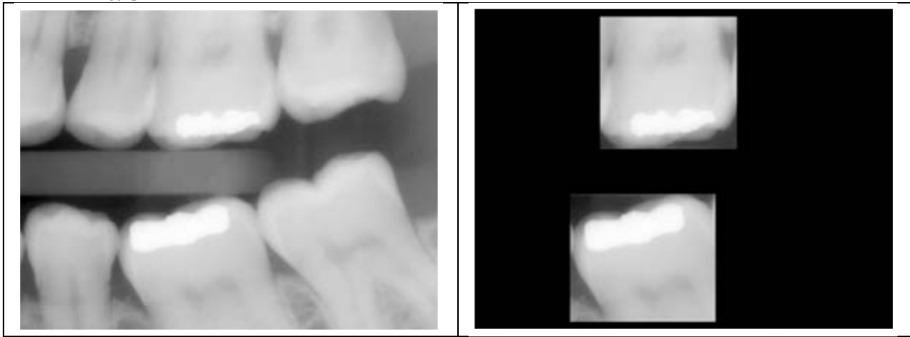

Image Masking


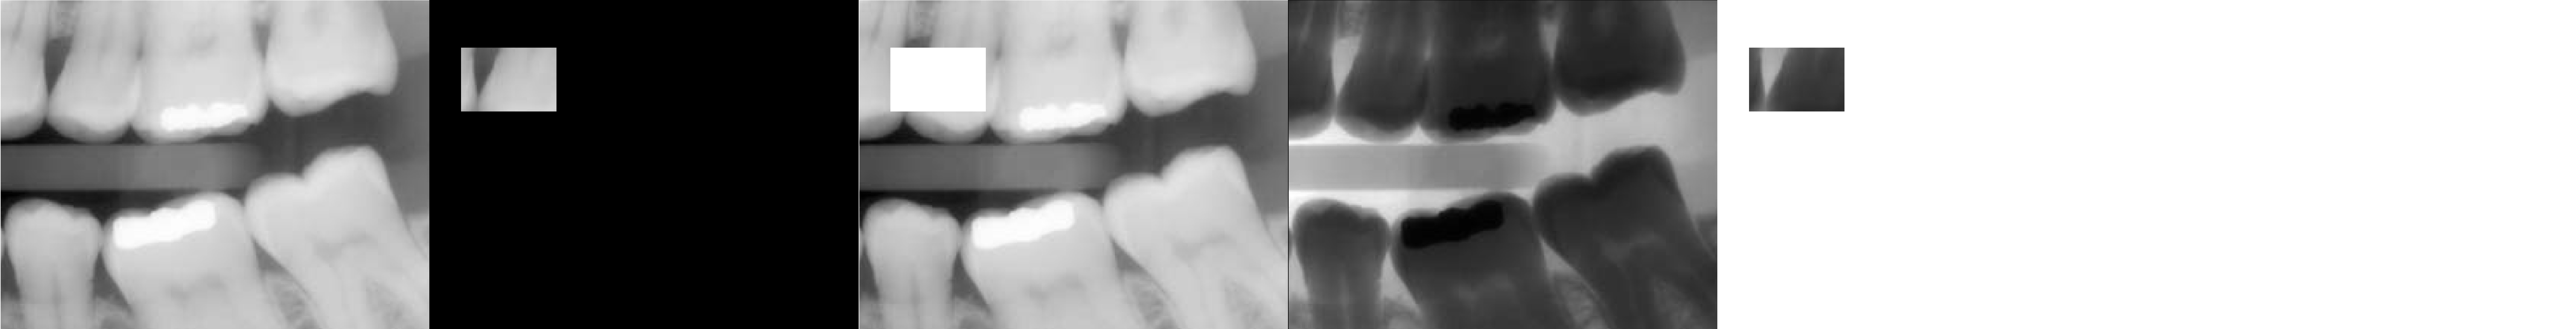

In [20]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load the original image
original_image = cv2.imread('/content/drive/MyDrive/PCVK/teeth.jpg')

# Create a mask with the same dimensions as the original image
mask = np.zeros_like(original_image)

# Define the region to be masked (example: a rectangle)
x, y, width, height = 100, 150, 300, 200
cv2.rectangle(mask, (x, y), (x + width, y + height), (255, 255, 255), thickness=cv2.FILLED)

# Perform different logical operations with the mask and the original image
mask_and = cv2.bitwise_and(original_image, mask)
mask_or = cv2.bitwise_or(original_image, mask)
mask_not = cv2.bitwise_not(original_image, mask)
mask_nand = cv2.bitwise_not(mask_and)
mask_xor = cv2.bitwise_xor(original_image, mask)

# Increase brightness of the XOR result
mask_xor_bright = cv2.add(mask_xor, np.full_like(mask_xor, (100, 100, 100), dtype=np.uint8))

# Create a side-by-side comparison of the original and masked images
result_image = np.hstack((original_image, mask_and, mask_or, mask_not, mask_nand, mask_xor_bright))

# Display the result image
print('Image Masking')
cv2_imshow(result_image)

# Wait for a key press and close the window
cv2.waitKey(0)
cv2.destroyAllWindows()
